In [237]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

## Load in dataframes

In [270]:
#Train data
file_path_trainC = "C:\\Users\\user\\Downloads\\widsdatathon2025\\TRAIN_NEW\\TRAIN_CATEGORICAL_METADATA_new.xlsx"
file_path_trainFCM = "C:\\Users\\user\\Downloads\\widsdatathon2025\\TRAIN_NEW\\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"
file_path_trainQ = "C:\\Users\\user\\Downloads\\widsdatathon2025\\TRAIN_NEW\\TRAIN_QUANTITATIVE_METADATA_new.xlsx"
file_path_trainS = "C:\\Users\\user\\Downloads\\widsdatathon2025\\TRAIN_NEW\\TRAINING_SOLUTIONS.xlsx"


In [243]:
# Test data
file_path_testC = "C:\\Users\\user\\Downloads\\widsdatathon2025\\TEST\\TEST_CATEGORICAL.xlsx"
file_path_testFCM = "C:\\Users\\user\\Downloads\\widsdatathon2025\\TEST\\TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
file_path_testQ = "C:\\Users\\user\\Downloads\\widsdatathon2025\\TEST\\TEST_QUANTITATIVE_METADATA.xlsx"


In [239]:
train_cat = pd.read_excel(file_path_trainC)
train_cat.head()


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [245]:
train_FCM = pd.read_csv(file_path_trainFCM)
train_FCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [247]:
train_Quant = pd.read_excel(file_path_trainQ)
train_Quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [249]:
train_Solutions = pd.read_excel(file_path_trainS)
train_Solutions.head()


,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [251]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [253]:
train_FCM.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [255]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [257]:
train_Solutions.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [292]:
# Rename label columns for consistency
train_Solutions = train_Solutions.rename(columns={
    'ADHD_Outcome': 'ADHD',
    'Sex_F': 'sex'
})

# Reset index to allow merge
train_df_reset = train_df.reset_index()

# Merge with labels
train_df_labeled = pd.merge(train_df_reset, train_Solutions, on="participant_id")

# Set participant_id as index again (optional)
train_df_labeled = train_df_labeled.set_index("participant_id")


## Exploratory Data Analysis

In [261]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [263]:
#Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

Barratt_Barratt_P2_Occ
45.0    239
35.0    195
30.0    149
40.0    116
15.0     86
0.0      65
20.0     41
5.0      38
10.0     37
25.0     25
Name: count, dtype: int64

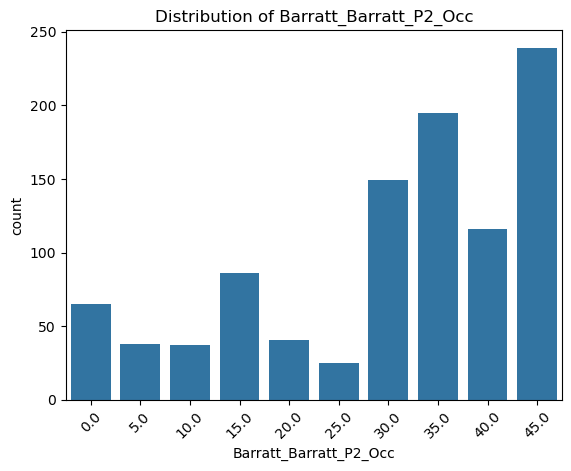

In [282]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

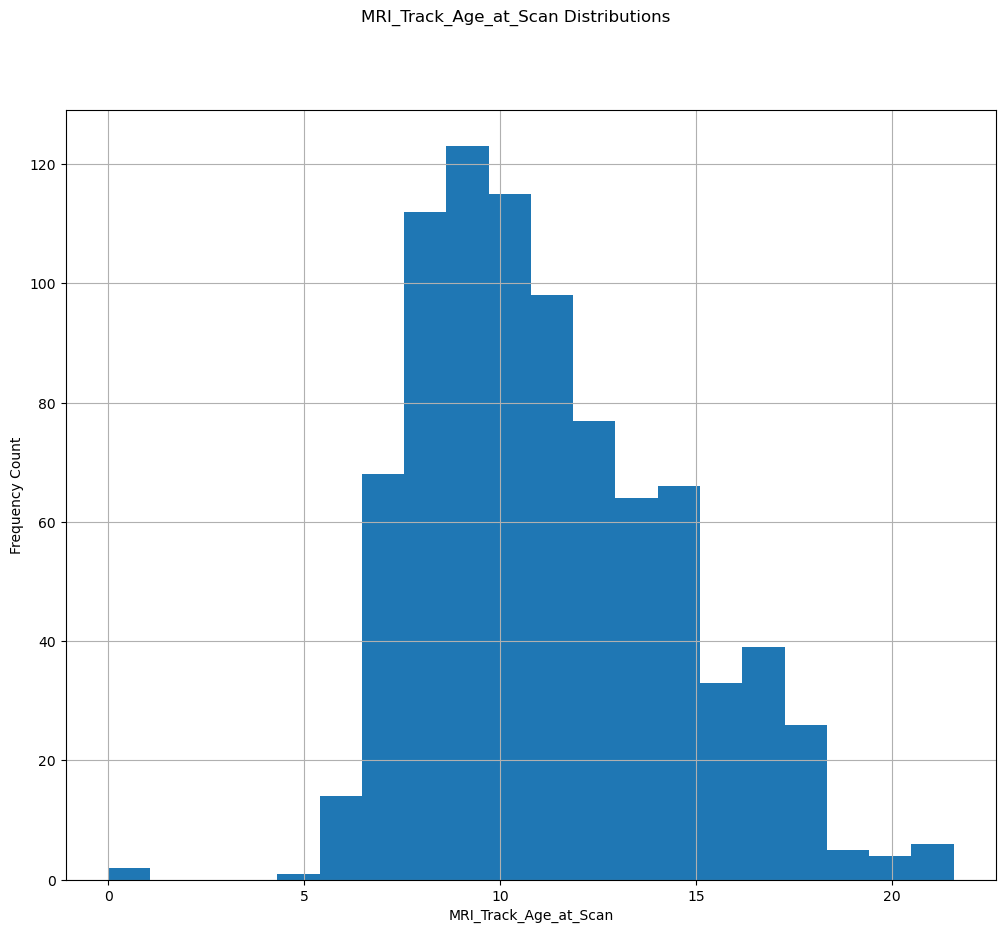

In [20]:
# Distribution of MRI_Track_Age_at_Scan
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()


The train_Solutions dataset contains labels for `ADHD` and `gender`. Let's examine the class distribution.

In [22]:
# ADHD distribution
train_Solutions['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

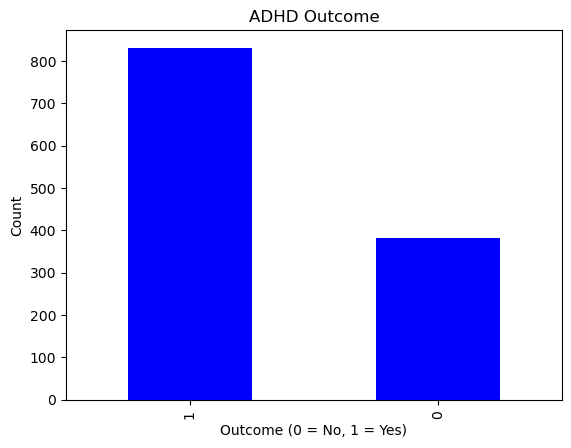

In [23]:
train_Solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [24]:
# Gender distribution
train_Solutions['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

**Key Insight**: Gender imbalance in the dataset may introduce bias in modeling. Address this during data preparation.

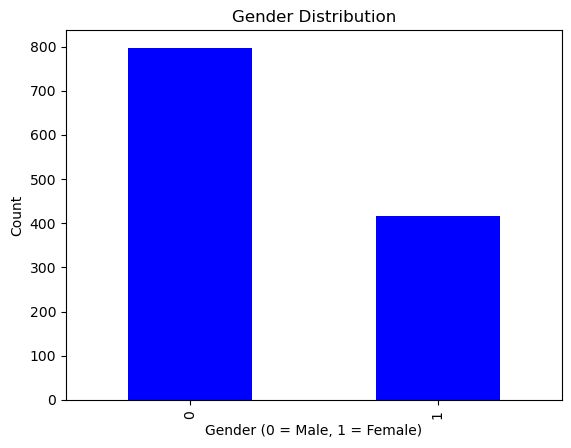

In [26]:
train_Solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

### How to Test Predictiveness:

##### **Quantitative Data**: Use histograms or boxplots to visualize distributions of quantitative (e.g., Color vision test score)

In [29]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

Let's look at the `SDQ_SDQ_Emotional_Problems`, which indicates Emotional Problems Scale.

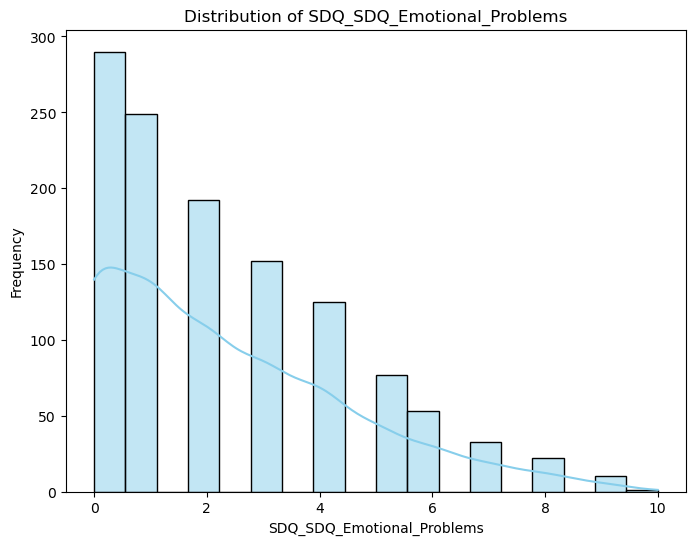

In [31]:
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_Quant['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

This boxplot examines the relationship between `SDQ_SDQ_Emotional_Problems` and `ADHD_outcome` (as a target variable).

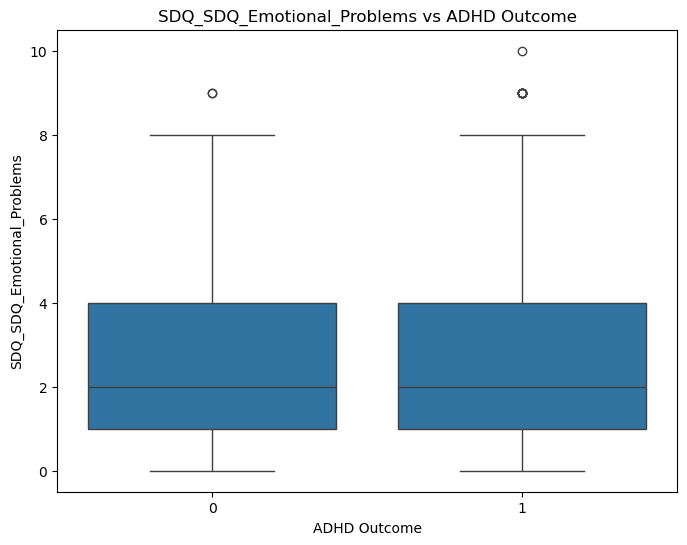

In [33]:
# Check for correlation with ADHD outcome
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_Quant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()


The boxplot reveals that individuals diagnosed with ADHD tend to have a higher median on the SDQ Emotional Problems scale compared to non-ADHD individuals. Additionally, the boxplot for the ADHD group displays greater variability, as evidenced by its extended range. This suggests that emotional problems are not only more pronounced but also more diverse within the ADHD group.

##### **Categorical Data**: Use bar plots to compare groups (e.g., ADHD rates by Parent 1 occupation).


In [36]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

Let's look at `Barratt_Barratt_P1_Edu` which indicates the Parent 1 level of education

- 3=Less than 7th grade
- 6=Junior high/Middle school (9th grade)
- 9=Partial high school (10th or 11th grade)
- 12=High school graduate
- 15=Partial college (at least one year)
- 18=College education
- 21=Graduate degree

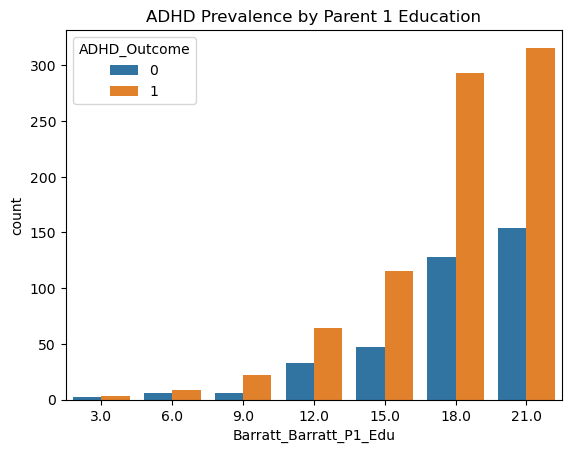

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_cat, x='Barratt_Barratt_P1_Edu', hue=train_Solutions['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 1 Education')
plt.show()

In [39]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64

Most of the data points fall into a specific category (e.g., 21 has 470 entries out of a total 1213). This means that even if ADHD prevalence appears higher in this category, it might just reflect that there are more people in this group overall, rather than an actual trend.

To adress this, normalize the data or compute percentages within each category to account for differences in group sizes. Let's compute ADHD percentage for each category.

In [42]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
3.0     0.600000
6.0     0.600000
9.0     0.785714
12.0    0.659794
15.0    0.709877
18.0    0.695962
21.0    0.672340
Name: ADHD_Outcome, dtype: float64


Categories like 3 - Less than 7th grade (80%) and 12 - High school graduate (72%) show some of the highest proportions of ADHD outcomes. Categories 21 - Graduate degree (67.2%) have relatively lower ADHD proportions compared to middle education levels.

In [44]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64

In [52]:
for col in train_cat.select_dtypes(include='int').columns:
    train_cat[col] = train_cat[col].astype('category')

In [54]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [56]:
# encoding categorical data
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

C:\Users\user\AppData\Local\Temp\ipykernel_152\2479499898.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [59]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,0,1,0,0,0,1
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,0,0,0,0,0,0
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,0,0,0,0,0,0
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,1,0,0,0,0,0
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,1,0,0,0,0,0


In [113]:
# Convert integer-type columns in test_cat to categorical type
int_columns = test_cat.select_dtypes(include='int').columns.tolist()
for name in int_columns:
    test_cat[name] = test_cat[name].astype('category')

# Perform one-hot encoding on the selected columns and normalize boolean values
test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
test_encoded = test_encoded.replace({True: 1, False: 0})

# Add any columns that exist in train_encoded but are missing in test_encoded
extra_columns = [col for col in train_encoded.columns if col not in test_encoded.columns]
for col in extra_columns:
    test_encoded[col] = 0

# Ensure column alignment between test_encoded and train_encoded
test_encoded = test_encoded[train_encoded.columns]

# Merge the encoded features back with the rest of test_cat (excluding the encoded columns)
cat_test_final = pd.concat([
    test_cat.drop(columns=columns_to_encode),
    test_encoded
], axis=1)

cat_test_final.head()


C:\Users\user\AppData\Local\Temp\ipykernel_152\1165915104.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_encoded = test_encoded.replace({True: 1, False: 0})


,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4
0,Cfwaf5FX7jWK,0.0,0.0,0,21.0,30.0,18.0,30.0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0.0,0.0,0,21.0,45.0,NaN,30.0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0.0,0.0,0,21.0,40.0,18.0,40.0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0.0,0.0,0,21.0,45.0,21.0,45.0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2.0,0.0,0,18.0,0.0,21.0,45.0,0,0,0,0,0,0,0,0


In [115]:
train_cat_FCM = pd.merge(cat_train_final, train_FCM, on = 'participant_id')

In [117]:
train_df = pd.merge(train_cat_FCM, train_Quant_copy, on = 'participant_id')

# ensure it looks accurate
train_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,...,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127,1
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,...,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN,1
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,...,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381,1
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,...,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553,1
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,...,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574,1


In [129]:
test_cat_FCM = pd.merge(cat_test_final, test_FCM , on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Quant, on = 'participant_id')
test_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0.0,0.0,0,21.0,30.0,18.0,30.0,0,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0.0,0.0,0,21.0,45.0,NaN,30.0,0,0,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0.0,0.0,0,21.0,40.0,18.0,40.0,0,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0.0,0.0,0,21.0,45.0,21.0,45.0,0,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,2.0,0.0,0,18.0,0.0,21.0,45.0,0,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [131]:
train_df = train_df.set_index('participant_id').sort_index()
train_df.head()

,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,...,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome
participant_id,,,,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,0,...,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127,1
00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,0,...,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN,1
04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,0,...,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381,1
05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,1,...,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553,1
06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,1,...,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574,1


In [288]:
# Reset index to merge on participant_id
train_df_reset = train_df.reset_index()

# Merge labels into the full training data
train_df_labeled = pd.merge(train_df_reset, train_Solutions, on="participant_id")

# Set index back (optional)
train_df_labeled = train_df_labeled.set_index("participant_id")


In [135]:
# check how many NA values we have
print(train_df.isna().sum())


PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
MRI_Track_Scan_Location               3
Barratt_Barratt_P1_Edu               15
Barratt_Barratt_P1_Occ               31
                                   ... 
SDQ_SDQ_Internalizing                 9
SDQ_SDQ_Peer_Problems                 9
SDQ_SDQ_Prosocial                     9
MRI_Track_Age_at_Scan               360
ADHD_Outcome                          0
Length: 19934, dtype: int64


In [139]:
# Replace NaNs in 'MRI_Track_Age_at_Scan' with the column's mean
mean_age = train_df['MRI_Track_Age_at_Scan'].mean()
train_df['MRI_Track_Age_at_Scan'].fillna(mean_age, inplace=True)

# Replace NaNs in 'PreInt_Demos_Fam_Child_Ethnicity' with that column's mean
mean_ethnicity = train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()
train_df['PreInt_Demos_Fam_Child_Ethnicity'].fillna(mean_ethnicity, inplace=True)

# Confirm all missing values have been handled
total_missing = train_df.isnull().sum().sum()
print(total_missing)


712


C:\Users\user\AppData\Local\Temp\ipykernel_152\4156298295.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MRI_Track_Age_at_Scan'].fillna(mean_age, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_152\4156298295.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [141]:
train_df.ffill(inplace=True)
print(train_df.isna().sum().sum())

2


In [143]:
# Fill missing values in 'MRI_Track_Age_at_Scan' using the mean from the test set
age_mean_test = test_df['MRI_Track_Age_at_Scan'].mean()
test_df['MRI_Track_Age_at_Scan'].fillna(age_mean_test, inplace=True)

# Fill missing values in 'PreInt_Demos_Fam_Child_Ethnicity' with its mean
ethnicity_mean_test = test_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()
test_df['PreInt_Demos_Fam_Child_Ethnicity'].fillna(ethnicity_mean_test, inplace=True)

# Double-check that no missing values remain
print("Total missing values in test data:", test_df.isnull().sum().sum())


Total missing values in test data: 456


C:\Users\user\AppData\Local\Temp\ipykernel_152\2383822855.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['MRI_Track_Age_at_Scan'].fillna(age_mean_test, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_152\2383822855.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [145]:
print(train_df.isna().sum())  # This should now be zero


PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P1_Occ              0
                                   ..
SDQ_SDQ_Internalizing               0
SDQ_SDQ_Peer_Problems               0
SDQ_SDQ_Prosocial                   0
MRI_Track_Age_at_Scan               0
ADHD_Outcome                        0
Length: 19934, dtype: int64


In [149]:
# Fill all remaining NaNs in numeric columns with their respective means
for col in test_df.columns:
    if test_df[col].dtype in ['float64', 'int64']:
        if test_df[col].isnull().any():
            test_df[col].fillna(test_df[col].mean(), inplace=True)

# Recheck missing values to confirm everything is filled
print("Remaining missing values in test_df:", test_df.isna().sum().sum())


C:\Users\user\AppData\Local\Temp\ipykernel_152\4045513006.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].mean(), inplace=True)


Remaining missing values in test_df: 0


In [151]:
print(test_df.isna().sum())  # This should now be zero

participant_id                      0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
                                   ..
SDQ_SDQ_Hyperactivity               0
SDQ_SDQ_Internalizing               0
SDQ_SDQ_Peer_Problems               0
SDQ_SDQ_Prosocial                   0
MRI_Track_Age_at_Scan               0
Length: 19934, dtype: int64


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Split the dataset: 70% training, 30% testing
X = train_df
y = train_Solutions[['ADHD_Outcome', 'Sex_F']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Impute missing values using column-wise mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define logistic regression inside a multi-output framework
logreg = LogisticRegression()
multi_target_model = MultiOutputClassifier(logreg)

# Train the classifier on the scaled training data
multi_target_model.fit(X_train_scaled, y_train)

# Predict outcomes on the test set
y_pred = multi_target_model.predict(X_test_scaled)

# Evaluate accuracy for each target
acc_target1 = accuracy_score(y_test.iloc[:, 0], y_pred[:, 0])
acc_target2 = accuracy_score(y_test.iloc[:, 1], y_pred[:, 1])

# Output the individual accuracies
print(f"Accuracy for ADHD_Outcome: {acc_target1}")
print(f"Accuracy for Sex_F: {acc_target2}")


Accuracy for ADHD_Outcome: 0.5796703296703297
Accuracy for Sex_F: 0.5357142857142857


In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# Base KNN model
knn = KNeighborsClassifier()

# Wrap in MultiOutputClassifier
multi_knn = MultiOutputClassifier(knn)

# Define hyperparameter grid for tuning
param_grid_knn = {
    'estimator__n_neighbors': [3, 5, 7, 9],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__metric': ['euclidean', 'manhattan']
}

# Set up GridSearchCV with multi-output classifier
grid_search_knn = GridSearchCV(
    estimator=multi_knn,
    param_grid=param_grid_knn,
    cv=3,  # Reduce to 3 if training is slow; change back to 5 if needed
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search_knn.fit(X_train_scaled, y_train)

# Get best model
best_knn = grid_search_knn.best_estimator_

# Predict on test set
y_pred_knn = best_knn.predict(X_test_scaled)

# Show results
print("KNN Best Parameters:", grid_search_knn.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
KNN Best Parameters: {'estimator__metric': 'manhattan', 'estimator__n_neighbors': 9, 'estimator__weights': 'uniform'}


In [201]:
evaluate_model(y_test, y_pred_knn, "Optimized K-Nearest Neighbors")



--- Evaluation Report: Optimized K-Nearest Neighbors ---
Sex Prediction:
              precision    recall  f1-score   support

           0       0.32      0.11      0.17       108
           1       0.71      0.90      0.79       256

    accuracy                           0.67       364
   macro avg       0.52      0.51      0.48       364
weighted avg       0.59      0.67      0.61       364

ADHD Prediction:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74       239
           1       0.33      0.14      0.19       125

    accuracy                           0.61       364
   macro avg       0.49      0.49      0.47       364
weighted avg       0.54      0.61      0.55       364

Overall Accuracy (Sex): 0.6676
Overall Accuracy (ADHD): 0.6071


In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create base decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Wrap in MultiOutputClassifier
multi_dt = MultiOutputClassifier(dt)

# Define hyperparameter grid (adjusted for multi-output)
param_grid_dt = {
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2]
}

# Set up grid search with 3-fold cross-validation
grid_search_dt = GridSearchCV(
    estimator=multi_dt,
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best model
best_dt = grid_search_dt.best_estimator_

# Predict on test set
y_pred_dt = best_dt.predict(X_test_scaled)

# Report tuning and performance
print("Decision Tree Best Parameters:", grid_search_dt.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Decision Tree Best Parameters: {'estimator__max_depth': 10, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5}


In [205]:
evaluate_model(y_test, y_pred_dt, "Optimized Decision Tree")



--- Evaluation Report: Optimized Decision Tree ---
Sex Prediction:
              precision    recall  f1-score   support

           0       0.39      0.38      0.38       108
           1       0.74      0.75      0.75       256

    accuracy                           0.64       364
   macro avg       0.57      0.56      0.57       364
weighted avg       0.64      0.64      0.64       364

ADHD Prediction:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       239
           1       0.41      0.31      0.35       125

    accuracy                           0.61       364
   macro avg       0.54      0.54      0.54       364
weighted avg       0.59      0.61      0.59       364

Overall Accuracy (Sex): 0.6401
Overall Accuracy (ADHD): 0.6071


In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize Random Forest model with parallel processing
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# Define reduced search space for faster grid search
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up the grid search with 3-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Fit the model to the training data
grid_search_rf.fit(X_train_scaled, y_train)

# Fetch the model with the best performing parameter combination
best_rf = grid_search_rf.best_estimator_

# Generate predictions using the test dataset
y_pred_rf = best_rf.predict(X_test_scaled)

# Calculate and display accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.49175824175824173


In [193]:
def evaluate_model(y_true, y_pred, model_name):
    import numpy as np
    from sklearn.metrics import classification_report, accuracy_score

    # Convert to numpy arrays if they aren't already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    print(f"\n--- Evaluation Report: {model_name} ---")
    print("Sex Prediction:")
    print(classification_report(y_true[:, 0], y_pred[:, 0]))
    print("ADHD Prediction:")
    print(classification_report(y_true[:, 1], y_pred[:, 1]))
    print(f"Overall Accuracy (Sex): {accuracy_score(y_true[:, 0], y_pred[:, 0]):.4f}")
    print(f"Overall Accuracy (ADHD): {accuracy_score(y_true[:, 1], y_pred[:, 1]):.4f}")


In [195]:
evaluate_model(y_test, y_pred, "Random Forest")



--- Evaluation Report: Random Forest ---
Sex Prediction:
              precision    recall  f1-score   support

           0       0.28      0.26      0.27       108
           1       0.70      0.71      0.71       256

    accuracy                           0.58       364
   macro avg       0.49      0.49      0.49       364
weighted avg       0.57      0.58      0.58       364

ADHD Prediction:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       239
           1       0.27      0.20      0.23       125

    accuracy                           0.54       364
   macro avg       0.45      0.46      0.45       364
weighted avg       0.50      0.54      0.52       364

Overall Accuracy (Sex): 0.5797
Overall Accuracy (ADHD): 0.5357


In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score

logreg = LogisticRegression(max_iter=1000)

multi_target_model_logreg = MultiOutputClassifier(logreg)

param_grid_logreg = {
    'estimator__C': [0.1, 1, 10],
    'estimator__solver': ['lbfgs']
}

grid_search_logreg = GridSearchCV(
    estimator=multi_target_model_logreg,
    param_grid=param_grid_logreg,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

grid_search_logreg.fit(X_train_scaled, y_train)

best_logreg = grid_search_logreg.best_estimator_

y_pred_logreg = best_logreg.predict(X_test_scaled)

print("Logistic Regression Best Parameters:", grid_search_logreg.best_params_)


Logistic Regression Best Parameters: {'estimator__C': 0.1, 'estimator__solver': 'lbfgs'}


In [209]:
evaluate_model(y_test, y_pred_logreg, "Optimized Logistic Regression")



--- Evaluation Report: Optimized Logistic Regression ---
Sex Prediction:
              precision    recall  f1-score   support

           0       0.28      0.21      0.24       108
           1       0.70      0.77      0.73       256

    accuracy                           0.60       364
   macro avg       0.49      0.49      0.49       364
weighted avg       0.57      0.60      0.58       364

ADHD Prediction:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       239
           1       0.25      0.18      0.21       125

    accuracy                           0.53       364
   macro avg       0.44      0.45      0.44       364
weighted avg       0.50      0.53      0.51       364

Overall Accuracy (Sex): 0.6016
Overall Accuracy (ADHD): 0.5330


In [213]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

# Define base neural network
mlp = MLPClassifier(max_iter=500, random_state=42)

# Wrap inside MultiOutputClassifier
multi_mlp = MultiOutputClassifier(mlp)

# Define parameter grid
param_grid_mlp = {
    'estimator__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'estimator__activation': ['relu', 'tanh'],
    'estimator__alpha': [0.0001, 0.001],
    'estimator__solver': ['adam']
}

# Grid search setup
grid_search_mlp = GridSearchCV(
    estimator=multi_mlp,
    param_grid=param_grid_mlp,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Train the model
grid_search_mlp.fit(X_train_scaled, y_train)

# Best model
best_mlp = grid_search_mlp.best_estimator_

# Predict on test set
y_pred_mlp = best_mlp.predict(X_test_scaled)

# Output best parameters
print("Neural Network Best Parameters:", grid_search_mlp.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Neural Network Best Parameters: {'estimator__activation': 'relu', 'estimator__alpha': 0.001, 'estimator__hidden_layer_sizes': (100, 50), 'estimator__solver': 'adam'}


In [215]:
evaluate_model(y_test, y_pred_mlp, "Optimized Neural Network")



--- Evaluation Report: Optimized Neural Network ---
Sex Prediction:
              precision    recall  f1-score   support

           0       0.33      0.31      0.32       108
           1       0.72      0.74      0.73       256

    accuracy                           0.61       364
   macro avg       0.53      0.52      0.52       364
weighted avg       0.60      0.61      0.61       364

ADHD Prediction:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       239
           1       0.29      0.20      0.24       125

    accuracy                           0.56       364
   macro avg       0.47      0.47      0.46       364
weighted avg       0.52      0.56      0.53       364

Overall Accuracy (Sex): 0.6126
Overall Accuracy (ADHD): 0.5577


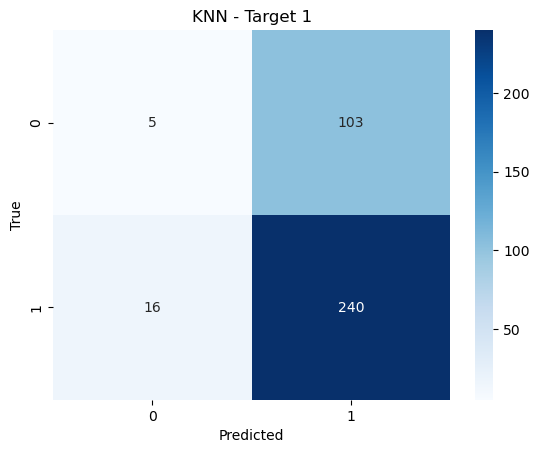

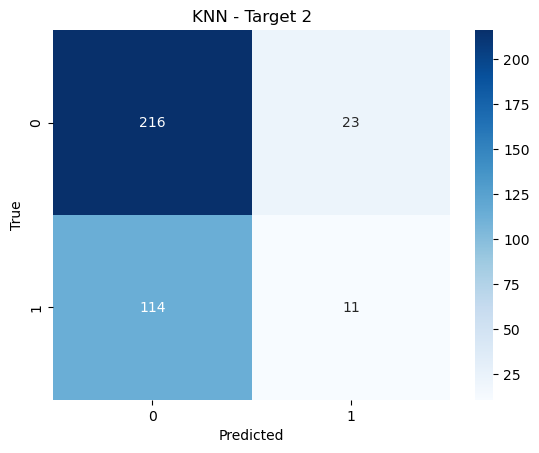

KNN F1 Score Target 1: 0.5865769126242008
KNN F1 Score Target 2: 0.5460186319190862


In [167]:
# --- KNN Evaluation ---
y_pred_knn = best_knn.predict(X_test_scaled)

# Confusion Matrix for KNN (Target 1)
cm_knn_1 = confusion_matrix(y_test.iloc[:, 0], y_pred_knn[:, 0])
sns.heatmap(cm_knn_1, annot=True, cmap='Blues', fmt='d')
plt.title("KNN - Target 1")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for KNN (Target 2)
cm_knn_2 = confusion_matrix(y_test.iloc[:, 1], y_pred_knn[:, 1])
sns.heatmap(cm_knn_2, annot=True, cmap='Blues', fmt='d')
plt.title("KNN - Target 2")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# F1 Scores
print("KNN F1 Score Target 1:", f1_score(y_test.iloc[:, 0], y_pred_knn[:, 0], average='weighted'))
print("KNN F1 Score Target 2:", f1_score(y_test.iloc[:, 1], y_pred_knn[:, 1], average='weighted'))


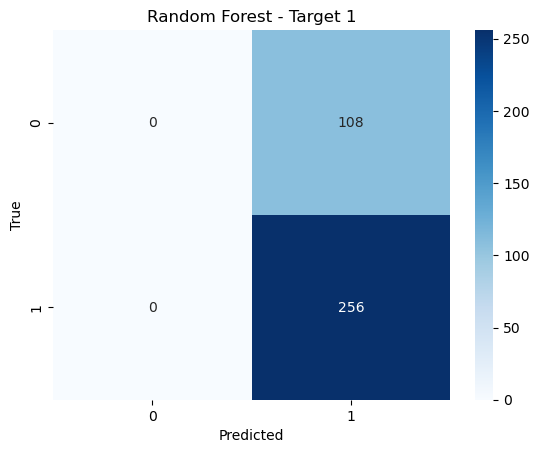

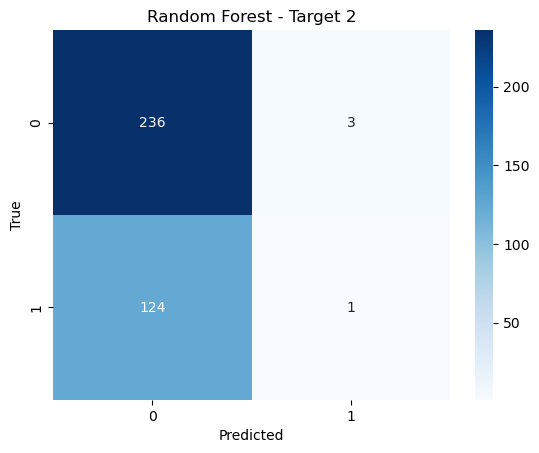

Random Forest F1 Score Target 1: 0.5807869549805034
Random Forest F1 Score Target 2: 0.5227065838355972


In [171]:
# --- Random Forest Evaluation ---
y_pred_rf = best_rf.predict(X_test_scaled)

# Confusion Matrix (Target 1)
cm_rf_1 = confusion_matrix(y_test.iloc[:, 0], y_pred_rf[:, 0])
sns.heatmap(cm_rf_1, annot=True, cmap='Blues', fmt='d')
plt.title("Random Forest - Target 1")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix (Target 2)
cm_rf_2 = confusion_matrix(y_test.iloc[:, 1], y_pred_rf[:, 1])
sns.heatmap(cm_rf_2, annot=True, cmap='Blues', fmt='d')
plt.title("Random Forest - Target 2")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# F1 Scores
print("Random Forest F1 Score Target 1:", f1_score(y_test.iloc[:, 0], y_pred_rf[:, 0], average='weighted'))
print("Random Forest F1 Score Target 2:", f1_score(y_test.iloc[:, 1], y_pred_rf[:, 1], average='weighted'))


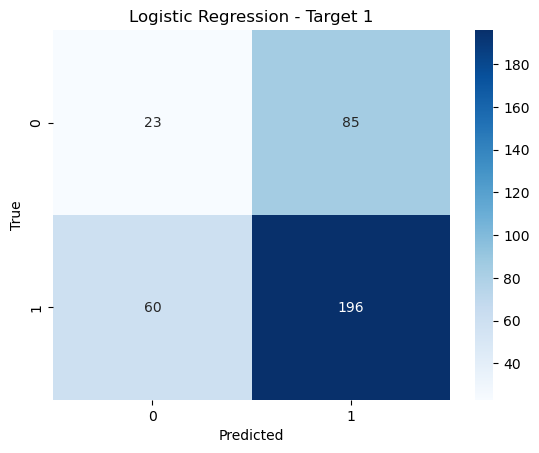

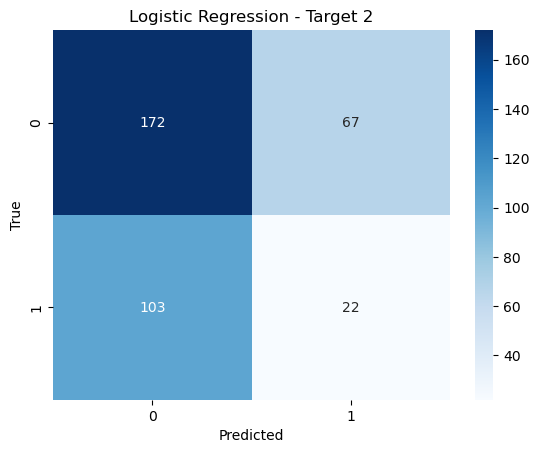

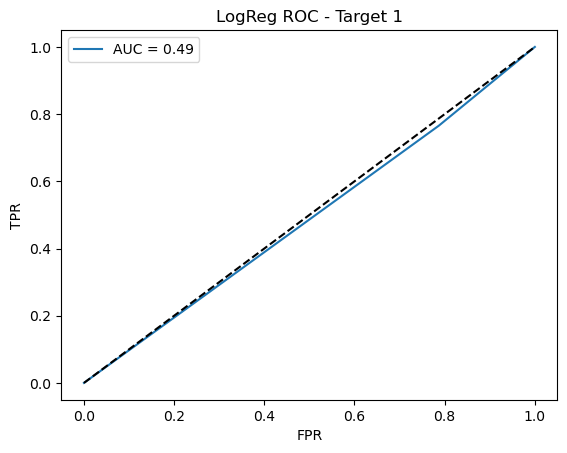

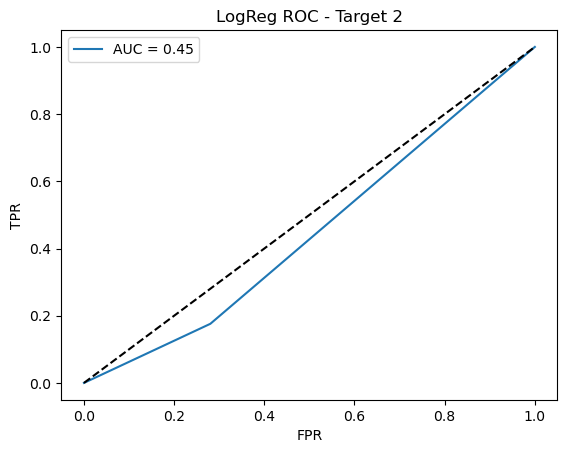

LogReg F1 Score Target 1: 0.5848508351067654
LogReg F1 Score Target 2: 0.5100391262978994


In [177]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc


# --- Logistic Regression Evaluation ---
y_pred_logreg = best_logreg.predict(X_test_scaled)

# Confusion Matrix (Target 1)
cm_logreg_1 = confusion_matrix(y_test.iloc[:, 0], y_pred_logreg[:, 0])
sns.heatmap(cm_logreg_1, annot=True, cmap='Blues', fmt='d')
plt.title("Logistic Regression - Target 1")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix (Target 2)
cm_logreg_2 = confusion_matrix(y_test.iloc[:, 1], y_pred_logreg[:, 1])
sns.heatmap(cm_logreg_2, annot=True, cmap='Blues', fmt='d')
plt.title("Logistic Regression - Target 2")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve for Target 1
fpr1, tpr1, _ = roc_curve(y_test.iloc[:, 0], y_pred_logreg[:, 0])
plt.plot(fpr1, tpr1, label=f'AUC = {auc(fpr1, tpr1):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("LogReg ROC - Target 1")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# ROC Curve for Target 2
fpr2, tpr2, _ = roc_curve(y_test.iloc[:, 1], y_pred_logreg[:, 1])
plt.plot(fpr2, tpr2, label=f'AUC = {auc(fpr2, tpr2):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("LogReg ROC - Target 2")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# F1 Scores
print("LogReg F1 Score Target 1:", f1_score(y_test.iloc[:, 0], y_pred_logreg[:, 0], average='weighted'))
print("LogReg F1 Score Target 2:", f1_score(y_test.iloc[:, 1], y_pred_logreg[:, 1], average='weighted'))


In [296]:
# Fill missing values with column means
X_full = X_full.fillna(X_full.mean(numeric_only=True))


In [298]:
# Step 2: Prepare and train final KNN model

# Split features and labels
X_full = train_df_labeled.drop(columns=["sex", "ADHD"])
y_full = train_df_labeled[["sex", "ADHD"]]

# Fill missing values
X_full = X_full.fillna(X_full.mean(numeric_only=True))

# Scale features
X_full_scaled = scaler.fit_transform(X_full)

# Train KNN model
final_model = best_knn
final_model.fit(X_full_scaled, y_full)


MultiOutputClassifier(estimator=KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=9))

In [312]:
# Step 1: Get the feature columns used during training
train_features = X_full.columns.tolist()

# Step 2: Make a copy of the test data
X_test_kaggle = test_df.copy()

# Step 3: Drop extra columns not in training features
X_test_kaggle = X_test_kaggle.drop(columns=[col for col in X_test_kaggle.columns if col not in train_features])

# Step 4: Reindex to match training feature order (this fills missing ones with NaN if needed)
X_test_kaggle = X_test_kaggle.reindex(columns=train_features)


In [314]:
# Fill numeric NaNs with mean, others with 0 (for dummy vars or one-hot features)
X_test_kaggle = X_test_kaggle.fillna(X_test_kaggle.mean(numeric_only=True)).fillna(0)


In [316]:
# 1. Align features
train_features = X_full.columns.tolist()
X_test_kaggle = test_df.copy()
X_test_kaggle = X_test_kaggle.drop(columns=[col for col in X_test_kaggle.columns if col not in train_features])
X_test_kaggle = X_test_kaggle.reindex(columns=train_features)

# 2. Fill all NaNs safely
X_test_kaggle = X_test_kaggle.fillna(X_test_kaggle.mean(numeric_only=True)).fillna(0)

# 3. Scale
X_test_kaggle_scaled = scaler.transform(X_test_kaggle)

# 4. Predict
kaggle_preds = final_model.predict(X_test_kaggle_scaled)

# 5. Save submission
submission = pd.DataFrame(kaggle_preds, columns=["sex", "ADHD"])
submission["participant_id"] = test_df.index
submission = submission[["participant_id", "sex", "ADHD"]]
submission.to_csv("submission.csv", index=False)
print("✅ Submission saved as 'submission.csv'")


✅ Submission saved as 'submission.csv'
